In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dfo = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


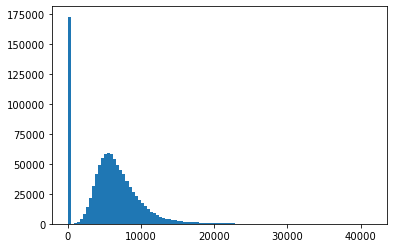

In [9]:
plt.hist(dfo.Sales, bins=100);

(844392, 9)


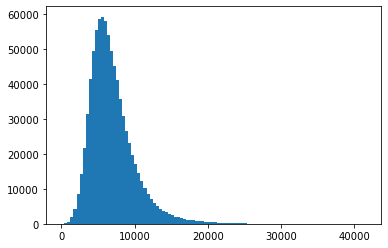

In [10]:
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales, bins=100)
print(df.shape);

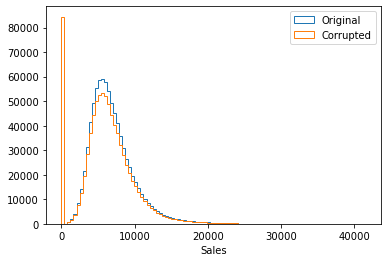

In [11]:
mask = np.random.choice(10, size=df.shape[0]) == 0
df['NewSales'] = df.Sales.copy()
df.loc[mask, 'NewSales'] = np.nan

plt.hist(df.Sales, label='Original', histtype='step', bins=100)
plt.hist(df.NewSales.fillna(0), label='Corrupted', histtype='step', bins=100)
plt.legend(), plt.xlabel('Sales');

## Using mean

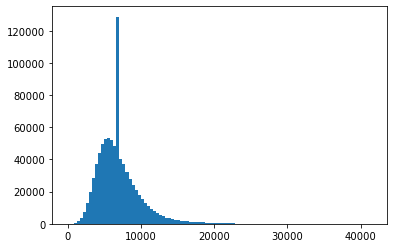

In [12]:
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins=100);

As we can see, the imputed values are focused on mean. Alternatively we can use group by day of week and store, because sales also depends on day and store

In [13]:
dfg = df.groupby(['Store', 'DayOfWeek'])
dfg.median().head()

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5346.0
      2          4640.5      549.5   1.0    1.0            0.0    4789.0
      3          4549.5      533.0   1.0    1.0            0.0    4559.5
      4          4380.0      525.0   1.0    1.0            0.0    4336.5
      5          4651.0      552.0   1.0    1.0            0.0    4651.0

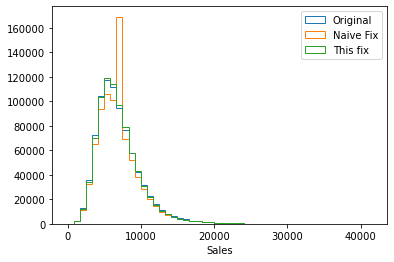

In [14]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

opts = {'histtype': 'step', 'bins': 50}
plt.hist(df.Sales, label='Original', **opts)
plt.hist(test_fix, label='Naive Fix', **opts)
plt.hist(test_fix2, label='This fix', **opts)
plt.legend(), plt.xlabel('Sales');